In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 


<class 'numpy.ndarray'>


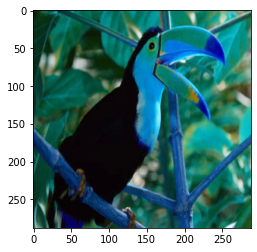

In [55]:
image_path = '/home/anis/Desktop/AI/MultiSPE/testsets/Set5/GTmod12/bird.png'
image1 = cv2.imread(image_path)
print(type(image1))
plt.imshow(image1)

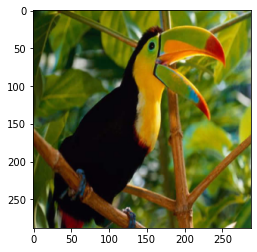

In [3]:
image_correct = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_correct)

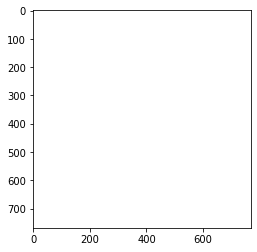

In [4]:
image_blank = np.ones(shape = (768, 768, 3))
plt.imshow(image_blank)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


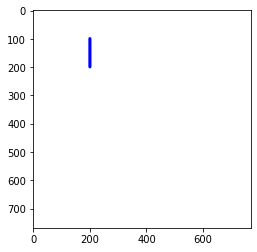

In [32]:
cv2.line(
   image_blank,
   pt1 = (200, 100), pt2 = (200, 200),
   color = (0, 0, 255),
   thickness = 10
)
plt.imshow(image_blank)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


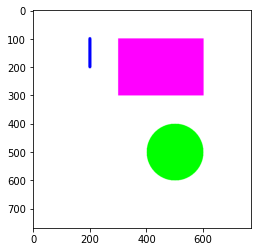

In [36]:
cv2.rectangle(
   image_blank,
   pt1 = (300, 100), pt2 = (600, 300),
   color = (255, 0, 255),
   thickness = -1
)
plt.imshow(image_blank)

In [ ]:
cv2.circle(
   image_blank,
   center = (500, 500),
   radius = 50,
   color = (0, 255, 0),
   thickness = -1
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 2)
(5, 1, 2)


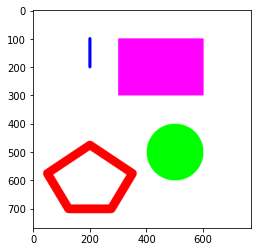

In [38]:
pol_vert = np.array([
   [200, 475],
   [50, 575],
   [125, 700],
   [275, 700],
   [350, 575]
])
print(pol_vert.shape)

(5, 2)

pol_vert = pol_vert.reshape((-1, 1, 2))
print(pol_vert.shape)

(5, 1, 2)

cv2.polylines(
   image_blank,
   [pol_vert],
   isClosed = True,
   color = (255, 0, 0),
   thickness = 30
)
plt.imshow(image_blank)

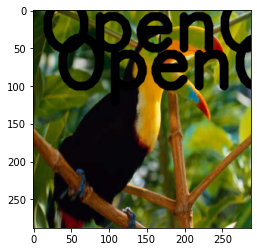

In [157]:
text_font = cv2.FONT_ITALIC
cv2.putText(
   image_correct,
   text = "OpenCV",
   org = (10, 50),
   fontFace = text_font,
   fontScale = 3,
   lineType = cv2.LINE_AA,
   color = (0, 0, 0),
   thickness = 1
)
plt.imshow(image_correct)

In [10]:
from utils.utils_blindsr import random_crop
import random

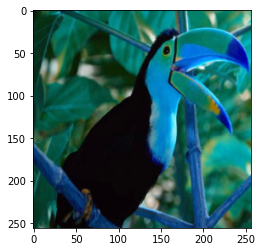

In [11]:
img = cv2.resize(image1, (int(1/4*image1.shape[1]), int(1/4*image1.shape[0])), interpolation=random.choice([1, 2, 3]))

img,hq = random_crop(img,image1)
plt.imshow(hq)

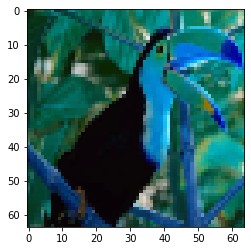

In [12]:
plt.imshow(img)

Image shape: (128, 128, 3)
Labels: [('rectangle', ((67, 128), (64, 69)))]


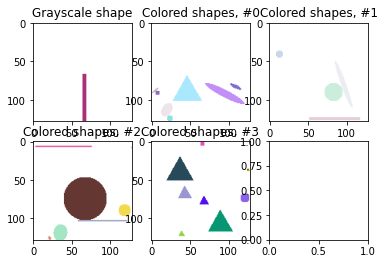

In [3]:
import matplotlib.pyplot as plt

from skimage.draw import random_shapes

# Let's start simple and generate a 128x128 image
# with a single grayscale rectangle.
result = random_shapes((128, 128), max_shapes=1, shape='rectangle',
                        random_seed=0)

# We get back a tuple consisting of (1) the image with the generated shapes
# and (2) a list of label tuples with the kind of shape (e.g. circle,
# rectangle) and ((r0, r1), (c0, c1)) coordinates.
image, labels = result
print(f'Image shape: {image.shape}\nLabels: {labels}')

# We can visualize the images.
fig, axes = plt.subplots(nrows=2, ncols=3)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Grayscale shape')

# The generated images can be much more complex. For example, let's try many
# shapes of any color. If we want the colors to be particularly light, we can
# set the `intensity_range` to an upper subrange of (0,255).
image1, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((100, 255),))

# Moar :)
image2, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((200, 255),))
image3, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((0, 255),))

for i, image in enumerate([image1, image2, image3, image4], 1):
    ax[i].imshow(image)
    ax[i].set_title(f'Colored shapes, #{i-1}')

# # These shapes are well suited to test segmentation algorithms. Often, we
# # want shapes to overlap to test the algorithm. This is also possible:
# image, _ = random_shapes((128, 128), min_shapes=5, max_shapes=10,
#                          min_size=20, allow_overlap=True)
# ax[5].imshow(image)
# ax[5].set_title('Overlapping shapes')

# for a in ax:
#     a.set_xticklabels([])
#     a.set_yticklabels([])

plt.show()

[[ 1.36035333  0.        ]
 [ 0.97344446  0.4334054 ]
 [ 1.13441425  1.25989466]
 [ 0.23555412  0.72496104]
 [-0.12631459  1.20180308]
 [-0.25405231  0.44003151]
 [-0.55162177  0.40077668]
 [-1.53038246  0.32529283]
 [-1.21231494 -0.25768549]
 [-0.35418809 -0.25733271]
 [-0.50378516 -0.8725815 ]
 [-0.12045484 -1.14605124]
 [ 0.40445235 -1.24477633]
 [ 0.54526981 -0.60558347]
 [ 0.29550511 -0.13156735]
 [ 1.36035333  0.        ]]



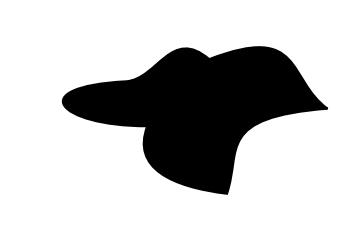

In [82]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

n = 5 # Number of possibly sharp edges
r = .7 # magnitude of the perturbation from the unit circle, 
# should be between 0 and 1
N = n*3+1 # number of points in the Path
# There is the initial point and 3 points per cubic bezier curve. Thus, the curve will only pass though n points, which will be the sharp edges, the other 2 modify the shape of the bezier curve

angles = np.linspace(0,2*np.pi,N)
codes = np.full(N,Path.CURVE4)
codes[0] = Path.MOVETO

verts = np.stack((np.cos(angles),np.sin(angles))).T*(2*r*np.random.random(N)+1-r)[:,None]
verts[-1,:] = verts[0,:] # Using this instad of Path.CLOSEPOLY avoids an innecessary straight line
path = Path(verts, codes)
print(verts)
fig = plt.figure()
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor="black", lw=2)
a = np.array(patch)
print()
ax.add_patch(patch)
ax.set_xlim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.set_ylim(np.min(verts)*1.1, np.max(verts)*1.1)
ax.axis('off') # removes the axis to leave only the shape

plt.show()

(288, 288, 3)


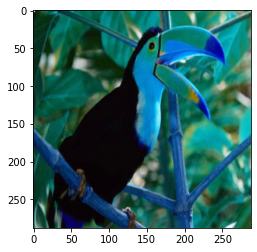

In [84]:
image_path = '/home/anis/Desktop/AI/MultiSPE/testsets/Set5/GTmod12/bird.png'
image1 = cv2.imread(image_path)
for i,point in enumerate(verts): 
    if i == len(verts) -1:
        break
    cv2.line(image1, (int(point[0]), int(point[1])),(int(verts[i+1][0]),int(verts[i+1][1])), [255, 255, 255], 2) 
print(np.shape(image1))
plt.imshow(image1)    


In [2]:
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt


bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)

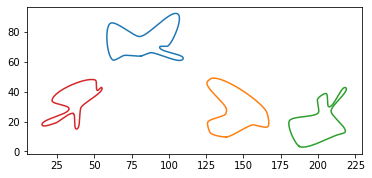

In [40]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

rad = 0.2
edgy = 0.05

for c in np.array([[60,50], [120,0], [170,0], [10,1]]):

    a = get_random_points(n=10, scale=50) + c
    x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
    plt.plot(x,y)

plt.show()

In [41]:
a = np.array([x[:],y[:]])
a= a.T


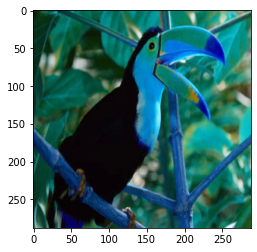

In [35]:

# mask = np.zeros(image1.shape[:2], dtype="uint8")
# im2,contours,hierarchy = cv2.findContours(image1, 1, 2)
# print(contours)
# cv2.drawContours(image1, , -1, 0, -1)

plt.imshow(image1)   

(1000, 2)
(1000, 1, 2)
(288, 288, 3)


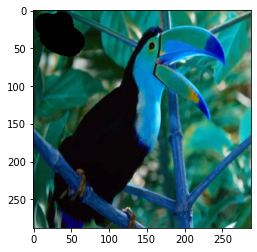

In [44]:
image_path = '/home/anis/Desktop/AI/MultiSPE/testsets/Set5/GTmod12/bird.png'
image1 = cv2.imread(image_path)
pts = a# np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
print(pts.shape)

pts = pts.reshape((-1,1,2)).astype(np.int32)
print(pts.shape)
print(image1.shape)
cv2.polylines(image1,[pts],True,(0,0,0),thickness=25)
plt.imshow(image1)

In [21]:
import cv2

image = np.array(image1)
image.shape
image[np.squeeze(x).astype(np.uint8),np.squeeze(y).astype(np.uint8),:]=[0,0,0]
# for pts in a:
#     image[int(pts[0]),int(pts[1]),:]=[255,255,255]

In [92]:
from random import randint

class AddMaskFace(object):
    """Convert ndarrays in sample to Tensors."""
    def __init__(self,color = (0,0,0)):
        self.output_size = None
        self.masks = [self.circle,self.arbitrary_shape,self.line,self.circle_mask,self.rectangle]
        self.color = color

    def __call__(self, image):

        h, w = image.shape[:2]
        self.output_size = min(h,w)
        
        img_L = self.masks[3](image)
        
        for i in range(randint(1,3)):
            img_L = self.masks[randint(0,2)](img_L)


        return img_L

    def line(self,image):
        offset = int(self.output_size / 9)
        threshold = int(self.output_size / 5)
        line_dim = 50000;
        while(line_dim > threshold):
            s_h = randint(offset,self.output_size-offset)
            s_w = randint(offset,self.output_size-offset)
            e_h = randint(s_h,self.output_size-offset)
            e_w = randint(s_w,self.output_size-offset)
            line_dim = np.sqrt((s_h - e_h)**2 + (s_w - e_w)**2)

        img_masked = cv2.line(
            image,
            pt1 = (s_w, s_h), pt2 = (e_w, e_h),
            color = self.color,
            thickness = randint(12,30))
        return img_masked    
    
    def rectangle(self,image):
        s_h = randint(0,int(self.output_size/3)-10)
        s_w = randint(0,int(self.output_size/3)-10)
        e_h = randint(s_h,int(self.output_size/3))
        e_w = randint(s_w,int(self.output_size/3))
        
        img_masked = cv2.rectangle(
                image,
                pt1 = (s_w, s_h), pt2 = (e_w, e_h),
                color = self.color,
                thickness = -1)
        return img_masked 

    def circle(self,image):
        s_h = randint(int(self.output_size/2-(self.output_size/3)),self.output_size-10)
        s_w = randint(int(self.output_size/2-(self.output_size/3)),self.output_size-10)
        raduis = randint(5,int(min(self.output_size - max(s_h,s_w),int(self.output_size/20))))
        
        img_masked = cv2.circle(
                    image,
                    center = (s_w, s_h),
                    radius = raduis,
                    color = self.color,
                    thickness = -1
                    )
        return img_masked

    def circle_mask(self,image):
        s_h = randint(int(self.output_size/2-(self.output_size/3)),self.output_size-10)
        s_w = randint(int(self.output_size/2-(self.output_size/3)),self.output_size-10)
        raduis = randint(5,int(min(self.output_size - max(s_h,s_w),int(self.output_size/20))))
        
        img_masked = cv2.circle(
                    image,
                    center = (s_w, s_h),
                    radius = raduis,
                    color = self.color,
                    thickness = randint(1,4)
                    )
        return img_masked


    def arbitrary_shape(self,image):
        offset = int(self.output_size / 7)
        rad = 0.2
        edgy = 0.05
        c = [randint(offset,self.output_size-offset),randint(offset,self.output_size-offset)]
        a = get_random_points(n=randint(5,20), scale=randint(4,int(self.output_size/7))) + c
        x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
        pts = np.array([x[:],y[:]]).T
        pts = pts.reshape((-1,1,2)).astype(np.int32)
        masked_image = cv2.polylines(image,[pts],True,color = self.color,thickness=randint(int(self.output_size/35),int(self.output_size/20)))
        return masked_image

(1024, 1024, 3)


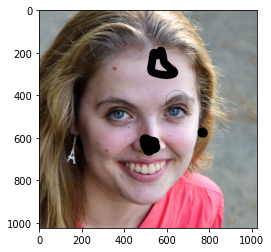

In [110]:
image_path = 'testsets/test_data/69008.png'
image1 = cv2.imread(image_path)
image_correct = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
masks = AddMaskFace((0,0,0))
image = masks(image_correct)
print(np.shape(image))
plt.imshow(image)

In [120]:
for i in range(0):
    print(i)